In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pandas as pd

In [10]:
ds=pd.read_csv("Twitter Curators' Evaluation.csv")

In [34]:
print ds.head(),ds.shape
print ds.isnull().sum()
df_columns= list(ds)
for n,col in enumerate(df_columns):
    print n,col

                        Timestamp                 Username              Name  \
0  2018/04/30 2:30:39 PM GMT+5:30     ideasmithy@gmail.com     Ramya Pandyan   
1  2018/04/30 2:50:43 PM GMT+5:30     27nainajha@gmail.com             Naina   
2  2018/04/30 3:04:55 PM GMT+5:30   xalxojessica@gmail.com     Jessica Xalxo   
3  2018/04/30 3:14:11 PM GMT+5:30    at@monkprayogshala.in  Monk Prayogshala   
4  2018/04/30 3:49:14 PM GMT+5:30  nipa.bhansali@gmail.com     Nipa Bhansali   

   How many times have you curated the Safecity Twitter handle?  \
0                                                  3              
1                                                  9              
2                                                  1              
3                                                  2              
4                                                  4              

             Please mention all your curation topics  \
0  Gender politics (gender seggregation on public...   
1  S

In [12]:
import nltk
# nltk.download("vader_lexicon")
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sid=SIA()

In [43]:
#data=ds['Please share your street harassment story, including what happened and how it made you feel.']
data=ds["Please describe your experience as a curator"]
print data[0]
sid.polarity_scores(data[0])

Curating the twitter account itself was interesting. But on one of the times that I curated the account, midweek I was suddenly asked to make a poster and pressured to host a livechat. This was not quite pleasant since I had made my availability clear early on (I had pre-scheduled tweets for the busy days so there would be no lapse from my side).


{'compound': -0.1825, 'neg': 0.106, 'neu': 0.814, 'pos': 0.08}

This is how the output of polarity score looks like - basically a score against <b> Positive, Negative and Neutral. </b>

In [44]:
sid.polarity_scores(data[1])

{'compound': 0.5859, 'neg': 0.04, 'neu': 0.851, 'pos': 0.109}

['Timestamp', 'Username', 'Name', 'How many times have you curated the Safecity Twitter handle?', 'Please mention all your curation topics', 'Did you curate any Twitter account before the curation with Safecity?', 'Please describe your experience as a curator', "What motivated you to be a curator for Safecity's Twitter handle?", 'Tell us about any challenges/problems you faced and how you overcame them?', 'How did you prepare yourself to be a curator?', 'How did your peers react to your curation topic?  ', 'Did you make any assumptions about curation?', 'How did you feel after curation period ended?', 'What change in your attitude did you observe after being a curator?', 'What change in your understanding of the topic did you observe after being a curator?', 'How did the responsibility of curating a Twitter handle with a large audience make your feel?', 'Did you find talking about the topic of sexual violence difficult?', "Did your feel a rise in your confidence while curating from Saf

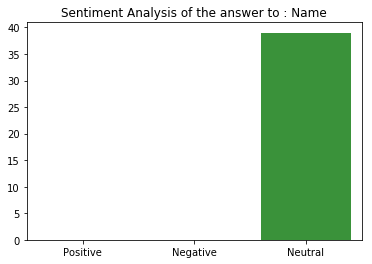

How many times have you curated the Safecity Twitter handle?


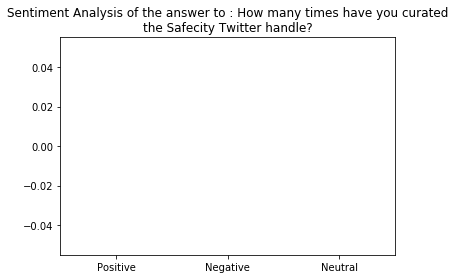

Please mention all your curation topics


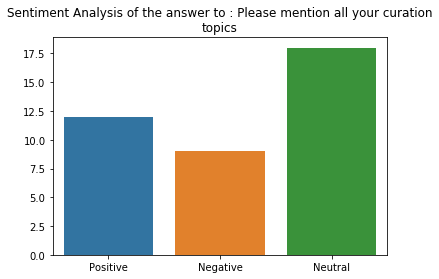

Did you curate any Twitter account before the curation with Safecity?


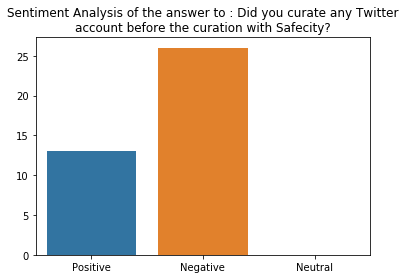

Please describe your experience as a curator


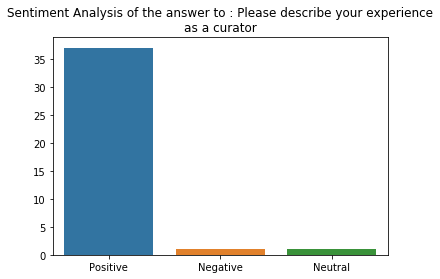

What motivated you to be a curator for Safecity's Twitter handle?


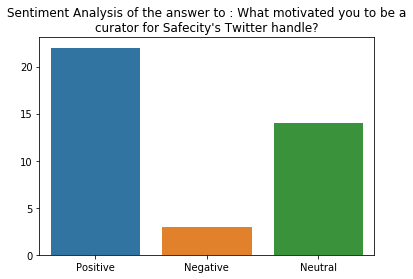

Tell us about any challenges/problems you faced and how you overcame them?


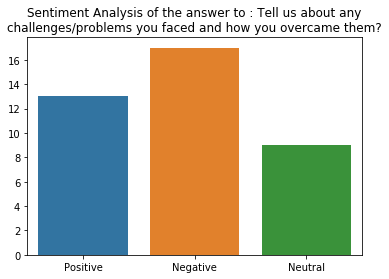

How did you prepare yourself to be a curator?


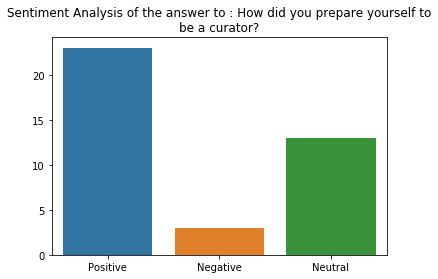

How did your peers react to your curation topic?  


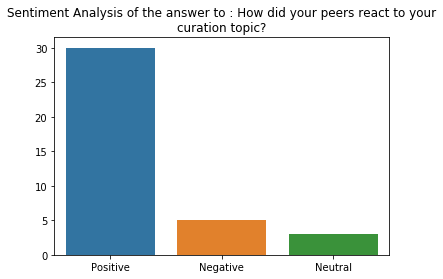

Did you make any assumptions about curation?


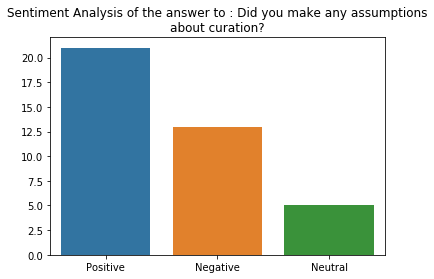

How did you feel after curation period ended?


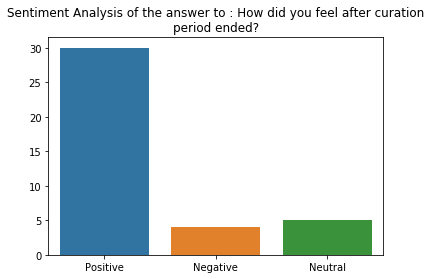

What change in your attitude did you observe after being a curator?


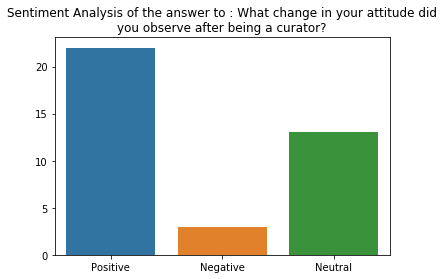

What change in your understanding of the topic did you observe after being a curator?


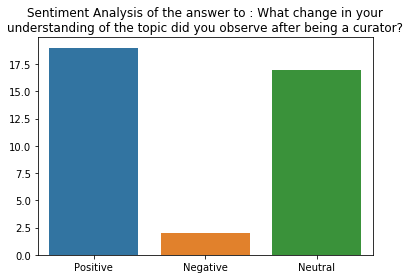

How did the responsibility of curating a Twitter handle with a large audience make your feel?


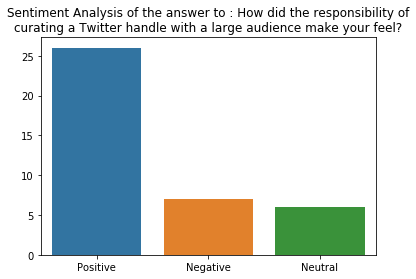

Did you find talking about the topic of sexual violence difficult?


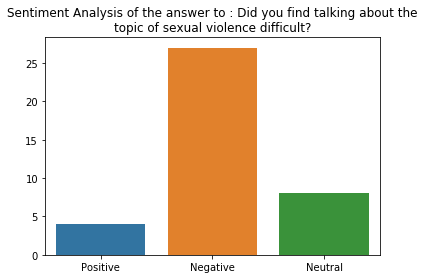

Did your feel a rise in your confidence while curating from Safecity's Twitter handle?  


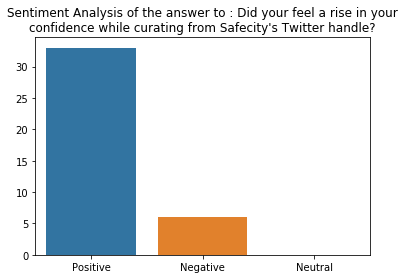

How do you plan on using the curation experience?


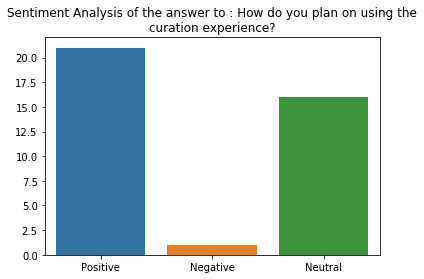

Did this experience make your feel more confident about speaking on your curation topic or other topics from your own Twitter handle?


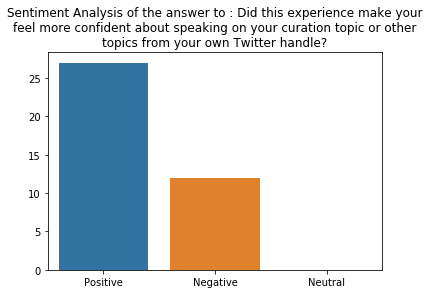

Would you recommend the Twitter curation of @pinthecreep to any of your friends or people in your network?


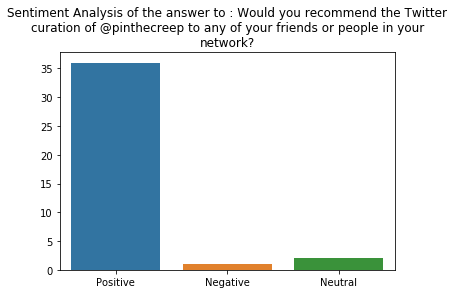

If you were to describe your experience to someone else in the form of a story, please share it with us here.


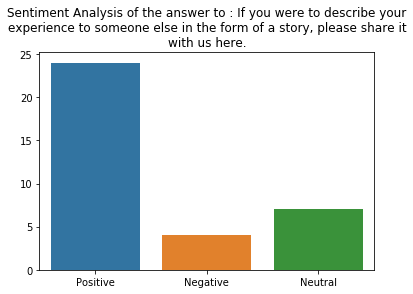

In [66]:
from textwrap import wrap

print (list(ds))
for col in list(ds)[2:]:
    print col
    data=ds[col]
    neg_count=0
    pos_count=0
    neu_count=0
    senti=[]
    for i in range(len(data)):
        if data[i]:
            try:
                temp=sid.polarity_scores(data[i])
                if(temp['compound']<0):
                    neg_count+=1
                    senti.append('neg')
                elif(temp['compound']>0):
                    pos_count+=1
                    senti.append('pos')
                else:
                    neu_count+=1
                    senti.append('neu')
            except:
                pass


    sentiment=[pos_count,neg_count,neu_count]
    sns.barplot(['Positive','Negative','Neutral'],sentiment)
    title="Sentiment Analysis of the answer to : "+col
#     plt.title(title)
    plt.title("\n".join(wrap(title)))
    title=col[0:10]+"-sentiment-plot.png"
    plt.savefig(title)
    
    plt.show()